In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
status = pd.read_csv("echidna_clone_status.8.1.24.csv", index_col=0).dropna().T
status.columns = ["echid_status_8.1.24"]

In [3]:
ip = pd.read_csv("var_exp_mt.csv", index_col=0).dropna()

In [5]:
adata = sc.read_h5ad("all_patients_anndata_Regressed.h5")

In [18]:
wouters = pd.read_csv("wouters_mel_sigs.csv")

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_45709/1428436661.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [4]:
import os
all_delta_eta = pd.DataFrame()
eta_mode = pd.read_csv("all_patient_neutral_values.csv", index_col=0)
PATH = "params_mt_refined/samples/"
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        eta = pd.read_csv("params_mt_refined/samples/"+patient+"/eta.csv", index_col=0)
        delta_eta = pd.DataFrame()
        for cluster in eta.columns:
            delta_eta[patient+"_"+cluster]=np.asarray(eta[cluster])-eta_mode[patient+"_"+cluster][0]
        delta_eta.index = eta.index
        all_delta_eta = pd.concat((all_delta_eta, delta_eta),axis=1)

F16
F03
F02
F12
R310
R319
F01


In [68]:
PATH = "params_mt_refined/samples/"
all_ads = []
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/X.h5")
        X.X = X.layers["counts"]
        all_ads.append(X)

F16
F03
F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


F12
R310
R319
F01


In [69]:
adata_nr = all_ads[0].concatenate(all_ads[1:])

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_30635/1565567718.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_nr = all_ads[0].concatenate(all_ads[1:])
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/merge.py:1279: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_annot = pd.concat(
/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_name

In [70]:
adata_nr.X = adata_nr.layers["counts"]


In [71]:
df = adata_nr.to_df()
var = pd.DataFrame(df.var())
thres = np.quantile(var[0],0.75)
var_filter = var[var[0]>thres].index

adata_nr = adata_nr[:,var_filter]

In [46]:
adata_nr.obs_names_make_unique()

In [56]:
sc.pp.calculate_qc_metrics(adata_nr, inplace=True)
adata_nr.layers["counts"] = adata_nr.X
# UPDATE OBS WITH USE

# store the current 'total_counts' under original_total_counts, which will not automatically be updated
# by scanpy in subsequent filtering steps
adata_nr.obs['original_total_counts'] = adata_nr.obs['total_counts']

# log10 original library size
adata_nr.obs['log10_original_total_counts'] = np.log10(adata_nr.obs['original_total_counts'])

# Normalize by median library size
med = np.median(adata_nr.obs['original_total_counts'])
sc.pp.normalize_total(adata_nr, target_sum = med)
sc.pp.log1p(adata_nr)

In [44]:
adata_nr.obs = adata_nr.obs.drop("inkt_evidence",axis=1)
adata_nr.write_h5ad("adata_no_regress_norm_togeter.h5")

In [57]:
sc.pp.neighbors(adata_nr)
sc.tl.umap(adata_nr)

# IP enrichments

In [5]:
ip

,F01_0,F01_1,F01_2,F01_3,F01_4,F01_5,F01_6,F01_7,F01_8,F03_0,...,R319_10,F02_0,F02_1,F02_2,F02_3,F02_4,F02_5,F02_6,F02_7,F02_8
genes,,,,,,,,,,,,,,,,,,,,,
ISG15,-1.293030,-1.782408,-1.716164,-1.898752,0.307184,-2.167251,-2.279961,-1.615895,-0.392139,-0.171778,...,-0.690495,-0.307916,-2.028099,-0.304170,0.410682,-1.359569,-1.387633,-2.120786,-1.154244,-0.931932
AGRN,-1.672372,-0.859757,-1.461317,-1.369206,-0.970145,-1.268584,-1.296249,-1.708866,-1.122197,-0.051303,...,-0.237175,0.089283,-0.874275,-0.571917,-0.005244,-0.552101,-0.584180,-1.480136,-0.518473,-0.178054
C1orf159,-1.305124,-1.055687,-1.695748,-1.141451,-0.855114,-0.583020,-0.965635,-1.642463,-0.621862,-0.168155,...,-0.640662,-0.011822,-1.049320,-0.925621,-0.563609,-0.685674,-0.343451,-0.640362,0.095233,-0.322895
AL390719.3,-1.767537,-1.843815,-1.978390,-1.098853,-0.075241,-1.017792,-1.901998,-1.730070,-0.964719,-0.608305,...,-0.378203,0.408294,-1.859617,-0.812151,0.589549,-0.511317,-0.003833,-2.026421,-0.134090,-0.387728
TNFRSF18,-1.285321,-1.970514,-2.005083,-1.258005,0.162556,-2.110454,-1.820076,-1.197606,-1.245045,-0.951740,...,-0.499059,0.398401,-2.346058,-0.735705,0.495675,-0.494691,0.116515,-2.091059,-0.176072,-0.490564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAMLD1,0.368505,0.646227,0.490156,0.591811,0.223145,0.333940,0.654887,0.309668,0.563655,-0.881094,...,0.385607,-0.039146,0.226771,0.200291,-0.469530,-0.409196,0.078272,0.445395,0.012968,0.333626
MTM1,0.635471,0.495814,0.566142,0.529111,0.257312,0.349058,0.576266,0.608434,0.206959,-1.056002,...,0.326728,-0.185628,0.433468,0.186602,-0.311116,-0.719269,-0.146743,0.135226,-0.291215,0.195129
MTMR1,0.523708,0.531421,0.475314,0.631867,0.169028,0.604305,0.613018,0.512674,0.280775,-1.304403,...,-0.079057,0.116570,0.110835,-0.204486,-0.123910,-0.847469,0.251039,0.014033,-0.269291,-0.228946


In [6]:
ip_scores_r310 = all_delta_eta[[i for i in ip.columns if "R310" in i]]

In [7]:
ip_scores_r310 = ip_scores_r310.loc[ip.index]

In [8]:
X = sc.read_h5ad("params_mt_refined/samples/"+patient+"/X.h5")
X = X[:, ip.index]
var = X.X.var(axis=0)
thresh = np.quantile(var, 0.85)
gene_filter = var > thresh
X = X[:, gene_filter]

In [9]:
filtered = np.intersect1d(X.var_names, ip_scores_r310.index)

In [10]:
filtered_data = ip_scores_r310.loc[filtered]
filtered_data["gene"]=filtered

In [11]:
filtered_data.shape

(2913, 13)

In [362]:
import tqdm


def calculate_es(data, genes_of_interest):
    data_sorted = data.sort_values(by='rank')
    hits = data_sorted['gene'].isin(genes_of_interest).astype(int)
    non_hits = 1 - hits
    Nh = hits.sum()
    Nm = non_hits.sum()
    
    # sum of hits vs non hits so if enriched hits should rank towards the top
    Phit = np.cumsum(hits / Nh) if Nh != 0 else np.cumsum(hits)
    Pmiss = np.cumsum(non_hits / Nm) if Nm != 0 else np.cumsum(non_hits)
    
    running_sum = Phit - Pmiss
    ES = running_sum.max()
    
    return ES

def permutation_test_es(data, cluster, genes_of_interest, n_permutations=10000):
    cluster_data = data[data['cluster'] == cluster].copy()
    observed_es = calculate_es(cluster_data, genes_of_interest)
    
    perm_es = np.zeros(n_permutations)
    for i in tqdm.tqdm(range(n_permutations)):
        permuted_genes = np.random.permutation(cluster_data['gene'])
        permuted_data = cluster_data.assign(gene=permuted_genes)
        perm_es[i] = calculate_es(permuted_data, genes_of_interest)
    
    # Use a more robust method to calculate p-values
    p_value = (np.sum(perm_es >= observed_es) + 1) / (n_permutations + 1)
    return observed_es, p_value, perm_es.std()

from statsmodels.stats.multitest import multipletests
def fdr_correction(p_values, alpha=0.05):
    # Add small random noise to p-values to reduce ties
    noise = np.random.uniform(0, 1e-10, size=p_values.shape)
    p_values_noisy = p_values + noise
    
    # Apply FDR-BH correction
    rejected, pvals_corrected, _, _ = multipletests(p_values_noisy, alpha=alpha, method='fdr_bh')
    return pd.Series(pvals_corrected, index=p_values.index)


data_long = filtered_data.melt(id_vars=['gene'], var_name='cluster', value_name='score')

# Rank genes within each cluster
data_long['rank'] = data_long.groupby('cluster')['score'].rank(ascending=False)

sigs_nes = {}
for s in wouters.columns:
    print(s)
    sig = [i for i in wouters[s] if not pd.isna(i)]
    subset_genes_high = list(set(filtered_data['gene'].unique()).intersection(set(list(sig))))
    results = []
    for cluster in data_long['cluster'].unique():
        es, p_value, std = permutation_test_es(data_long, cluster, subset_genes_high, n_permutations=1000)
        results.append({'cluster': cluster, 'enrichment_score': es, 'p_value': p_value, 'std': std})
    
        results_df = pd.DataFrame(results)
        results_df['p_value_adj'] = fdr_correction(results_df['p_value'], alpha=0.05)
    sigs_nes[s] = results_df

MAPKi_INDUCED_EMT


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1308.14it/s]


MAPKi_INDUCED_ANGIOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1534.50it/s]


POST_OP_WOUNDHEALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1273.80it/s]


MS_RESP_TO_WOUNDING_UP_IN_MAPKi_aPDL1_NR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1363.18it/s]


PH_BLOOD_VESS_DEVEL_DN_IN_R


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1464.47it/s]


MS_RESP_TO_HYPOXIA_UP_IN_MAPKi_aPDL1_NR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1337.89it/s]


JAEGER_METASTASIS_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1316.68it/s]


ANASTASSIOU_CANCER_MESENCHYMAL_TRANSITION_SIGNATURE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1355.31it/s]


rambow_mitosis


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1394.75it/s]


rambow_pigmentation


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1318.00it/s]


rambow_invasion


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1581.47it/s]


rambow_neuro


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1345.87it/s]


rambow_immune


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1350.80it/s]


rambow_MITF_targets


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1200.71it/s]


JAEGER_METASTASIS_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1149.42it/s]


ALONSO_METASTASIS_EMT_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1240.82it/s]


ALONSO_METASTASIS_EMT_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1414.81it/s]


ALONSO_METASTASIS_NEURAL_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1273.52it/s]


ALONSO_METASTASIS_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1255.88it/s]


ALONSO_METASTASIS_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1241.61it/s]


SARRIO_EPITHELIAL_MESENCHYMAL_TRANSITION_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1329.45it/s]


SARRIO_EPITHELIAL_MESENCHYMAL_TRANSITION_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1246.04it/s]


KAUFFMANN_MELANOMA_RELAPSE_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1222.99it/s]


KAUFFMANN_MELANOMA_RELAPSE_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1386.36it/s]


KAUFFMANN_DNA_REPAIR_GENES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1250.69it/s]


KAUFFMANN_DNA_REPLICATION_GENES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1215.94it/s]


WINNEPENNINCKX_MELANOMA_METASTASIS_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1200.94it/s]


WINNEPENNINCKX_MELANOMA_METASTASIS_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1369.99it/s]


AP1_targets


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1322.69it/s]


AXL_SIGNATURE_GODING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1407.34it/s]


GO_AMEBOIDAL_TYPE_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1306.49it/s]


GO_CELLULAR_EXTRAVASATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1358.91it/s]


GO_CELL_MIGRATION_INVOLVED_IN_GASTRULATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1535.90it/s]


GO_CEREBRAL_CORTEX_RADIALLY_ORIENTED_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1319.56it/s]


GO_NEGATIVE_REGULATION_OF_BLOOD_VESSEL_ENDOTHELIAL_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1322.16it/s]


GO_POSITIVE_REGULATION_OF_BLOOD_VESSEL_ENDOTHELIAL_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1344.60it/s]


GO_POSITIVE_REGULATION_OF_FIBROBLAST_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1384.03it/s]


GO_REGULATION_OF_BLOOD_VESSEL_ENDOTHELIAL_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1295.00it/s]


GO_REGULATION_OF_CELL_MIGRATION_INVOLVED_IN_SPROUTING_ANGIOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1343.17it/s]


GO_REGULATION_OF_FIBROBLAST_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1374.60it/s]


GO_REGULATION_OF_MONONUCLEAR_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1475.26it/s]


GO_WOUND_HEALING_SPREADING_OF_EPIDERMAL_CELLS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1477.86it/s]


HOEK_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1602.67it/s]


HOEK_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1236.90it/s]


JEFFS_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1418.99it/s]


JEFFS_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1220.23it/s]


LEE_NEURAL_CREST_STEM_CELL_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1314.87it/s]


MITF_targets


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1260.49it/s]


REACTOME_SEMA4D_INDUCED_CELL_MIGRATION_AND_GROWTH_CONE_COLLAPSE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1161.51it/s]


RIESENBERG_MELANOMA_TNF_RESPONSE_GODING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1314.68it/s]


SALUBRINAL_SIGNATURE_GODING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1345.88it/s]


SOX10_targets


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1236.25it/s]


TEAD_targets


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1374.75it/s]


VERF_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1318.18it/s]


VERF_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1285.61it/s]


WU_CELL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1359.62it/s]


cheng_lymph_top100


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1350.89it/s]


cheng_mesench_top100


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1414.50it/s]


cheng_mitotic_top100


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1286.92it/s]


hugo_IPRES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1241.35it/s]


CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1283.72it/s]


HALLMARK_ADIPOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1243.30it/s]


HALLMARK_ALLOGRAFT_REJECTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1279.04it/s]


HALLMARK_ANDROGEN_RESPONSE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1287.72it/s]


HALLMARK_ANGIOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1131.23it/s]


HALLMARK_APICAL_JUNCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1241.80it/s]


HALLMARK_APICAL_SURFACE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1221.01it/s]


HALLMARK_APOPTOSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1356.07it/s]


HALLMARK_BILE_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1367.92it/s]


HALLMARK_CHOLESTEROL_HOMEOSTASIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1377.49it/s]


HALLMARK_COAGULATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1289.51it/s]


HALLMARK_COMPLEMENT


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1230.55it/s]


HALLMARK_DNA_REPAIR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1374.35it/s]


HALLMARK_E2F_TARGETS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1314.55it/s]


HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1101.41it/s]


HALLMARK_ESTROGEN_RESPONSE_EARLY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1281.38it/s]


HALLMARK_ESTROGEN_RESPONSE_LATE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1372.45it/s]


HALLMARK_FATTY_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1194.03it/s]


HALLMARK_G2M_CHECKPOINT


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1314.15it/s]


HALLMARK_GLYCOLYSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1324.07it/s]


HALLMARK_HEDGEHOG_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1407.40it/s]


HALLMARK_HEME_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1250.26it/s]


HALLMARK_HYPOXIA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1319.24it/s]


HALLMARK_IL2_STAT5_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1031.53it/s]


HALLMARK_IL6_JAK_STAT3_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1275.75it/s]


HALLMARK_INFLAMMATORY_RESPONSE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1259.73it/s]


HALLMARK_INTERFERON_ALPHA_RESPONSE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1403.87it/s]


HALLMARK_INTERFERON_GAMMA_RESPONSE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1319.80it/s]


HALLMARK_KRAS_SIGNALING_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1171.55it/s]


HALLMARK_KRAS_SIGNALING_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1364.66it/s]


HALLMARK_MITOTIC_SPINDLE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1138.70it/s]


HALLMARK_MTORC1_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1255.94it/s]


HALLMARK_MYC_TARGETS_V1


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1294.40it/s]


HALLMARK_MYC_TARGETS_V2


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1217.10it/s]


HALLMARK_MYOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1204.09it/s]


HALLMARK_NOTCH_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1220.38it/s]


HALLMARK_OXIDATIVE_PHOSPHORYLATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1382.53it/s]


HALLMARK_P53_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1344.22it/s]


HALLMARK_PANCREAS_BETA_CELLS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1358.82it/s]


HALLMARK_PEROXISOME


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1310.74it/s]


HALLMARK_PI3K_AKT_MTOR_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1327.98it/s]


HALLMARK_PROTEIN_SECRETION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1227.96it/s]


HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1099.21it/s]


HALLMARK_SPERMATOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1221.68it/s]


HALLMARK_TGF_BETA_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1291.42it/s]


HALLMARK_TNFA_SIGNALING_VIA_NFKB


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1356.41it/s]


HALLMARK_UNFOLDED_PROTEIN_RESPONSE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1253.56it/s]


HALLMARK_UV_RESPONSE_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1392.98it/s]


HALLMARK_UV_RESPONSE_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1279.25it/s]


HALLMARK_WNT_BETA_CATENIN_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1210.03it/s]


HALLMARK_XENOBIOTIC_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1313.25it/s]


HARRIS_HYPOXIA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1364.21it/s]


JEON_SMAD6_TARGETS_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1244.96it/s]


KARAKAS_TGFB1_SIGNALING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1327.05it/s]


KEGG_ABC_TRANSPORTERS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1363.20it/s]


KEGG_ACUTE_MYELOID_LEUKEMIA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1205.10it/s]


KEGG_ADHERENS_JUNCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1251.63it/s]


KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1198.44it/s]


KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1314.38it/s]


KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1328.94it/s]


KEGG_ALLOGRAFT_REJECTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1403.11it/s]


KEGG_ALPHA_LINOLENIC_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1395.22it/s]


KEGG_ALZHEIMERS_DISEASE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1366.72it/s]


KEGG_AMINOACYL_TRNA_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1306.91it/s]


KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1350.89it/s]


KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1363.13it/s]


KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1315.98it/s]


KEGG_APOPTOSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1364.22it/s]


KEGG_ARACHIDONIC_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1199.27it/s]


KEGG_ARGININE_AND_PROLINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1276.14it/s]


KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1288.39it/s]


KEGG_ASCORBATE_AND_ALDARATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1515.67it/s]


KEGG_ASTHMA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1528.48it/s]


KEGG_AUTOIMMUNE_THYROID_DISEASE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1427.47it/s]


KEGG_AXON_GUIDANCE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1321.64it/s]


KEGG_BASAL_CELL_CARCINOMA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1317.85it/s]


KEGG_BASAL_TRANSCRIPTION_FACTORS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1324.26it/s]


KEGG_BASE_EXCISION_REPAIR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1377.85it/s]


KEGG_BETA_ALANINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1352.85it/s]


KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1303.22it/s]


KEGG_BLADDER_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1346.84it/s]


KEGG_BUTANOATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1091.82it/s]


KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1281.20it/s]


KEGG_CALCIUM_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1375.21it/s]


KEGG_CARDIAC_MUSCLE_CONTRACTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1184.16it/s]


KEGG_CELL_ADHESION_MOLECULES_CAMS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1405.52it/s]


KEGG_CELL_CYCLE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1350.06it/s]


KEGG_CHEMOKINE_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1292.55it/s]


KEGG_CHRONIC_MYELOID_LEUKEMIA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1360.03it/s]


KEGG_CIRCADIAN_RHYTHM_MAMMAL


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1370.71it/s]


KEGG_CITRATE_CYCLE_TCA_CYCLE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1343.06it/s]


KEGG_COLORECTAL_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1334.71it/s]


KEGG_COMPLEMENT_AND_COAGULATION_CASCADES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1356.28it/s]


KEGG_CYSTEINE_AND_METHIONINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1403.77it/s]


KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1399.72it/s]


KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1372.36it/s]


KEGG_DILATED_CARDIOMYOPATHY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1368.76it/s]


KEGG_DNA_REPLICATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1352.40it/s]


KEGG_DORSO_VENTRAL_AXIS_FORMATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1400.81it/s]


KEGG_DRUG_METABOLISM_CYTOCHROME_P450


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1341.70it/s]


KEGG_DRUG_METABOLISM_OTHER_ENZYMES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1377.81it/s]


KEGG_ECM_RECEPTOR_INTERACTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1283.71it/s]


KEGG_ENDOCYTOSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1213.91it/s]


KEGG_ENDOMETRIAL_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1327.92it/s]


KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1342.81it/s]


KEGG_ERBB_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1387.27it/s]


KEGG_ETHER_LIPID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1319.73it/s]


KEGG_FATTY_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1132.37it/s]


KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1311.86it/s]


KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1349.06it/s]


KEGG_FOCAL_ADHESION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1366.20it/s]


KEGG_FOLATE_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1401.76it/s]


KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1364.76it/s]


KEGG_GALACTOSE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1364.72it/s]


KEGG_GAP_JUNCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1305.98it/s]


KEGG_GLIOMA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1266.01it/s]


KEGG_GLUTATHIONE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1405.07it/s]


KEGG_GLYCEROLIPID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1352.56it/s]


KEGG_GLYCEROPHOSPHOLIPID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1407.10it/s]


KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1456.82it/s]


KEGG_GLYCOLYSIS_GLUCONEOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1329.67it/s]


KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1354.13it/s]


KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1390.14it/s]


KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1366.24it/s]


KEGG_GLYCOSAMINOGLYCAN_DEGRADATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1357.38it/s]


KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1357.91it/s]


KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1396.26it/s]


KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1206.73it/s]


KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1286.67it/s]


KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1275.84it/s]


KEGG_GNRH_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1312.48it/s]


KEGG_GRAFT_VERSUS_HOST_DISEASE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1433.14it/s]


KEGG_HEDGEHOG_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1388.87it/s]


KEGG_HEMATOPOIETIC_CELL_LINEAGE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1378.21it/s]


KEGG_HISTIDINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1476.82it/s]


KEGG_HOMOLOGOUS_RECOMBINATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1320.09it/s]


KEGG_HUNTINGTONS_DISEASE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1279.22it/s]


KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1392.87it/s]


KEGG_INOSITOL_PHOSPHATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1328.54it/s]


KEGG_INSULIN_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1305.45it/s]


KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1392.32it/s]


KEGG_JAK_STAT_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1395.02it/s]


KEGG_LEISHMANIA_INFECTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1302.81it/s]


KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1145.64it/s]


KEGG_LIMONENE_AND_PINENE_DEGRADATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1388.90it/s]


KEGG_LINOLEIC_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1512.19it/s]


KEGG_LONG_TERM_DEPRESSION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1126.01it/s]


KEGG_LONG_TERM_POTENTIATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1036.69it/s]


KEGG_LYSINE_DEGRADATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1243.82it/s]


KEGG_LYSOSOME


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1212.84it/s]


KEGG_MAPK_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1371.40it/s]


KEGG_MATURITY_ONSET_DIABETES_OF_THE_YOUNG


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1492.93it/s]


KEGG_MELANOGENESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1329.20it/s]


KEGG_MELANOMA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1343.12it/s]


KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1358.62it/s]


KEGG_MISMATCH_REPAIR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1393.52it/s]


KEGG_MTOR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1372.74it/s]


KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1282.56it/s]


KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1269.86it/s]


KEGG_NEUROTROPHIN_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1285.88it/s]


KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1390.38it/s]


KEGG_NITROGEN_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1410.79it/s]


KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1365.19it/s]


KEGG_NON_HOMOLOGOUS_END_JOINING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1246.17it/s]


KEGG_NON_SMALL_CELL_LUNG_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1306.71it/s]


KEGG_NOTCH_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1376.10it/s]


KEGG_NUCLEOTIDE_EXCISION_REPAIR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1269.45it/s]


KEGG_N_GLYCAN_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1287.83it/s]


KEGG_OLFACTORY_TRANSDUCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1316.05it/s]


KEGG_ONE_CARBON_POOL_BY_FOLATE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1410.72it/s]


KEGG_OOCYTE_MEIOSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1339.56it/s]


KEGG_OTHER_GLYCAN_DEGRADATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1337.38it/s]


KEGG_OXIDATIVE_PHOSPHORYLATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1269.98it/s]


KEGG_O_GLYCAN_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1144.44it/s]


KEGG_P53_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1282.26it/s]


KEGG_PANCREATIC_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1260.24it/s]


KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1432.32it/s]


KEGG_PARKINSONS_DISEASE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1296.68it/s]


KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1356.55it/s]


KEGG_PATHWAYS_IN_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1271.88it/s]


KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1318.61it/s]


KEGG_PENTOSE_PHOSPHATE_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1330.13it/s]


KEGG_PEROXISOME


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1289.08it/s]


KEGG_PHENYLALANINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1201.45it/s]


KEGG_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1363.50it/s]


KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1474.22it/s]


KEGG_PPAR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1078.57it/s]


KEGG_PRIMARY_BILE_ACID_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1286.76it/s]


KEGG_PRIMARY_IMMUNODEFICIENCY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1526.84it/s]


KEGG_PRION_DISEASES


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1352.92it/s]


KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1230.81it/s]


KEGG_PROPANOATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1327.89it/s]


KEGG_PROSTATE_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1290.31it/s]


KEGG_PROTEASOME


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1094.02it/s]


KEGG_PROTEIN_EXPORT


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1324.00it/s]


KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1359.49it/s]


KEGG_PURINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1381.63it/s]


KEGG_PYRIMIDINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1295.54it/s]


KEGG_PYRUVATE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1318.22it/s]


KEGG_REGULATION_OF_ACTIN_CYTOSKELETON


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1300.90it/s]


KEGG_REGULATION_OF_AUTOPHAGY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1340.89it/s]


KEGG_RENAL_CELL_CARCINOMA


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1378.46it/s]


KEGG_RENIN_ANGIOTENSIN_SYSTEM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1437.06it/s]


KEGG_RETINOL_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1265.75it/s]


KEGG_RIBOFLAVIN_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1361.77it/s]


KEGG_RIBOSOME


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1274.73it/s]


KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1389.53it/s]


KEGG_RNA_DEGRADATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1232.60it/s]


KEGG_RNA_POLYMERASE


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1344.45it/s]


KEGG_SELENOAMINO_ACID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1338.93it/s]


KEGG_SMALL_CELL_LUNG_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1376.93it/s]


KEGG_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1281.84it/s]


KEGG_SPHINGOLIPID_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1085.25it/s]


KEGG_SPLICEOSOME


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1096.93it/s]


KEGG_STARCH_AND_SUCROSE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1274.60it/s]


KEGG_STEROID_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1400.93it/s]


KEGG_STEROID_HORMONE_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1359.84it/s]


KEGG_SULFUR_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1471.09it/s]


KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1098.79it/s]


KEGG_TASTE_TRANSDUCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1280.06it/s]


KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1365.96it/s]


KEGG_TERPENOID_BACKBONE_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1368.15it/s]


KEGG_TGF_BETA_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1357.12it/s]


KEGG_THYROID_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1337.15it/s]


KEGG_TIGHT_JUNCTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1299.20it/s]


KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1319.37it/s]


KEGG_TRYPTOPHAN_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1391.51it/s]


KEGG_TYPE_II_DIABETES_MELLITUS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1273.51it/s]


KEGG_TYPE_I_DIABETES_MELLITUS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1307.95it/s]


KEGG_TYROSINE_METABOLISM


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1306.13it/s]


KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1328.59it/s]


KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1343.46it/s]


KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1205.28it/s]


KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1343.09it/s]


KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1318.54it/s]


KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1141.95it/s]


KEGG_VEGF_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1248.25it/s]


KEGG_VIBRIO_CHOLERAE_INFECTION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1311.17it/s]


KEGG_VIRAL_MYOCARDITIS


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1388.99it/s]


KEGG_WNT_SIGNALING_PATHWAY


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1299.99it/s]


LIEN_BREAST_CARCINOMA_METAPLASTIC


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1267.99it/s]


LU_TUMOR_ANGIOGENESIS_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1316.15it/s]


LU_TUMOR_ENDOTHELIAL_MARKERS_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1109.59it/s]


LU_TUMOR_VASCULATURE_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1358.48it/s]


MAHADEVAN_GIST_MORPHOLOGICAL_SWITCH


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1272.50it/s]


MAINA_VHL_TARGETS_DN


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1382.64it/s]


MISHRA_CARCINOMA_ASSOCIATED_FIBROBLAST_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1469.14it/s]


POOLA_INVASIVE_BREAST_CANCER_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1207.57it/s]


ROY_WOUND_BLOOD_VESSEL_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1229.74it/s]


VECCHI_GASTRIC_CANCER_ADVANCED_VS_EARLY_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1260.31it/s]


WESTON_VEGFA_TARGETS_12HR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1276.56it/s]


WESTON_VEGFA_TARGETS_6HR


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1343.02it/s]


YE_METASTATIC_LIVER_CANCER


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1234.23it/s]


GO_PIGMENTATION


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1278.72it/s]


GSS_GODING


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1321.00it/s]


HKG_Chang_etal_PlosOne_2011


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1235.90it/s]


HKG_Eisenberg_etal_TIG_2013


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1327.79it/s]


LEF1_UP.V1_UP


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1197.97it/s]


MINN_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1248.86it/s]


MINN_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1318.42it/s]


MXI_ChIP_Atlas_top200_targets


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1325.19it/s]


RAMASWAMY_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1182.54it/s]


RAMASWAMY_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1131.97it/s]


SEMI_4INVvs2SEMI


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1202.72it/s]


SEMI_9PROvs2SEMI


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1354.64it/s]


VEER_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1357.32it/s]


VEER_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1273.19it/s]


XU_INV


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1282.55it/s]


XU_PRO


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1300.34it/s]


raj_drug_response


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1194.91it/s]


raj_resistance


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1188.48it/s]


Baron_Mature_melanocytes


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1407.82it/s]


Baron_Neural_crest


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1315.41it/s]


Baron_Stress_like


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1301.15it/s]


Tirosh_AXL_sig


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1396.88it/s]


Tirosh_MITF_sig


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1087.94it/s]


Wouters_Intermediate_cell_state


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1189.28it/s]


Wouters_Mesenchymal_like_cell_state


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1226.49it/s]


Wouters_Melanocytic_cell_state


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1218.26it/s]


NGFR_coreceptors


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1535.22it/s]


NGFR_signaling 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1445.13it/s]


NGFR_ligands 


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1454.91it/s]


OXPHOS_fischer


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1408.18it/s]


tsoi_undifferentiated


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1332.63it/s]


tsoi_neural_crest


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1340.79it/s]


tsoi_transitory


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1341.46it/s]


tsoi_melanocytic


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1295.70it/s]


jerby_resistance_up


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1348.56it/s]


jerby_resistance_down


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1323.91it/s]


CIN70


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1163.45it/s]


NCSC_rambow


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1346.38it/s]


INVASIVE_rambow


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1517.20it/s]


SMC_rambow


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1453.63it/s]


HYPERdiff_rambow


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1264.15it/s]


mesenchymal_vs_CAF_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1379.81it/s]


Anitgen_pres_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1356.38it/s]


Interferon_a_b_response_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1307.91it/s]


Melanocytic_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1332.15it/s]


Mesenchymal_like_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1372.74it/s]


Neural_Crest_like_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1311.97it/s]


Stress_hypoxia_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1413.28it/s]


Stress_p53_pozniak


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1323.99it/s]


Immune_resistance_wang


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1354.78it/s]


In [363]:
import pickle
filehandler = open("GDX_enrich_R310_2k.pickle","wb")
pickle.dump(sigs_nes,filehandler)

In [25]:
import pickle
with open('IP_nes.pickle', 'rb') as file:
    sigs_nes = pickle.load(file)

In [38]:
trim_nes = {}
for key in sigs_nes.keys():
    for i in sigs_nes[key].p_value_adj:
        if i<.03:
            trim_nes[key]=sigs_nes[key]
            break

In [39]:
vis_nes = pd.DataFrame()
for key in trim_nes.keys():
    vis_nes[key]=trim_nes[key].enrichment_score

In [40]:
vis_nes.index = trim_nes[key]["cluster"]

In [41]:
vis_nes = vis_nes[[i for i in vis_nes.columns if (("KEGG" not in i) or ("ANTIGEN" in i))]]

In [421]:
mean.shape

(13398, 67)

In [420]:
mean = pd.DataFrame()
df = r310_ad.to_df()
for s in vis_nes.columns:
    sig = [i for i in wouters[s] if (not pd.isna(i)) and (i in ip_scores_r310.index)]
    mean[s] = df[sig].mean(axis=1)

In [422]:
obs = r310_ad.obs
clust_mean = pd.DataFrame()
for clust in obs["leiden"]:
    clust_mean[clust] = mean.loc[obs[obs["leiden"]==clust].index].mean(axis=0)

In [423]:
clust_mean.columns = ["R310_"+i for i in clust_mean.columns]

In [424]:
pal = {"growing":"red","shrinking":"green","stable":"yellow"}
colors = [pal[status.loc[i]["echid_status_8.1.24"]] for i in clust_mean.columns]

In [425]:
spell = []
for i in clust_mean.index:
    if "Anitgen" in i:
        spell.append("Antigen_pres_pozniak")
    else:
        spell.append(i)
clust_mean.index = spell

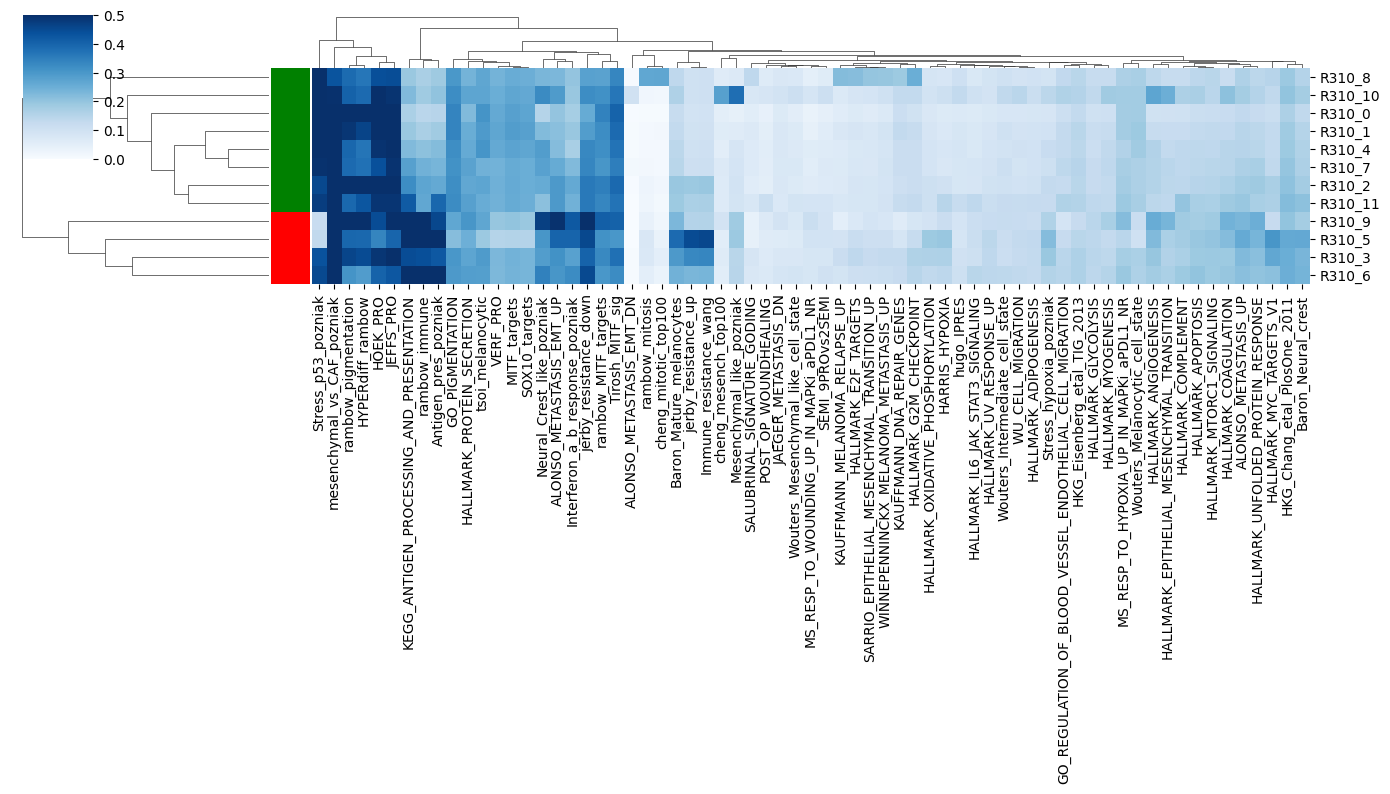

In [430]:
sns.clustermap(clust_mean.T,xticklabels=True, cmap='Blues', figsize=(14,8), row_colors=colors,vmin=0,vmax=.5)
plt.savefig("FIGURES1/exp_enrichments.pdf", dpi=300)

In [42]:
mean = pd.DataFrame()
for s in vis_nes.columns:
    sig = [i for i in wouters[s] if (not pd.isna(i)) and (i in ip.index)]
    mean[s] = ip_scores_r310.loc[sig].mean(axis=0)


In [43]:
plot = np.sign(mean)*np.asarray(vis_nes)

In [44]:
pal = {"growing":"red","shrinking":"green","stable":"yellow"}
colors = [pal[status.loc[i]["echid_status_8.1.24"]] for i in plot.index]

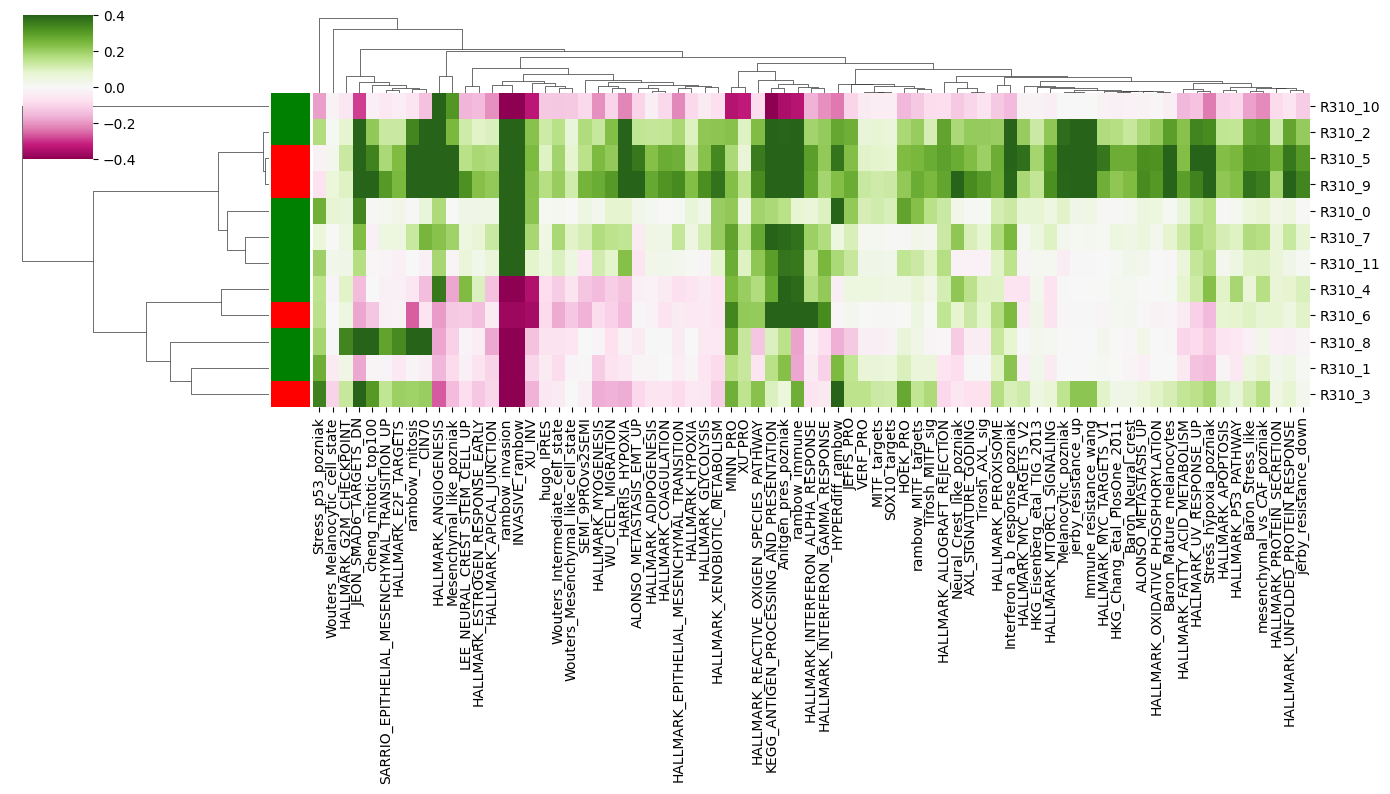

In [37]:
#this was made with p<.05, not sure why the below one was p<.03??
sns.clustermap(plot, figsize=(14,8),xticklabels=True, cmap='PiYG', metric='cosine', row_colors=colors, vmin=-.4, vmax=.4)

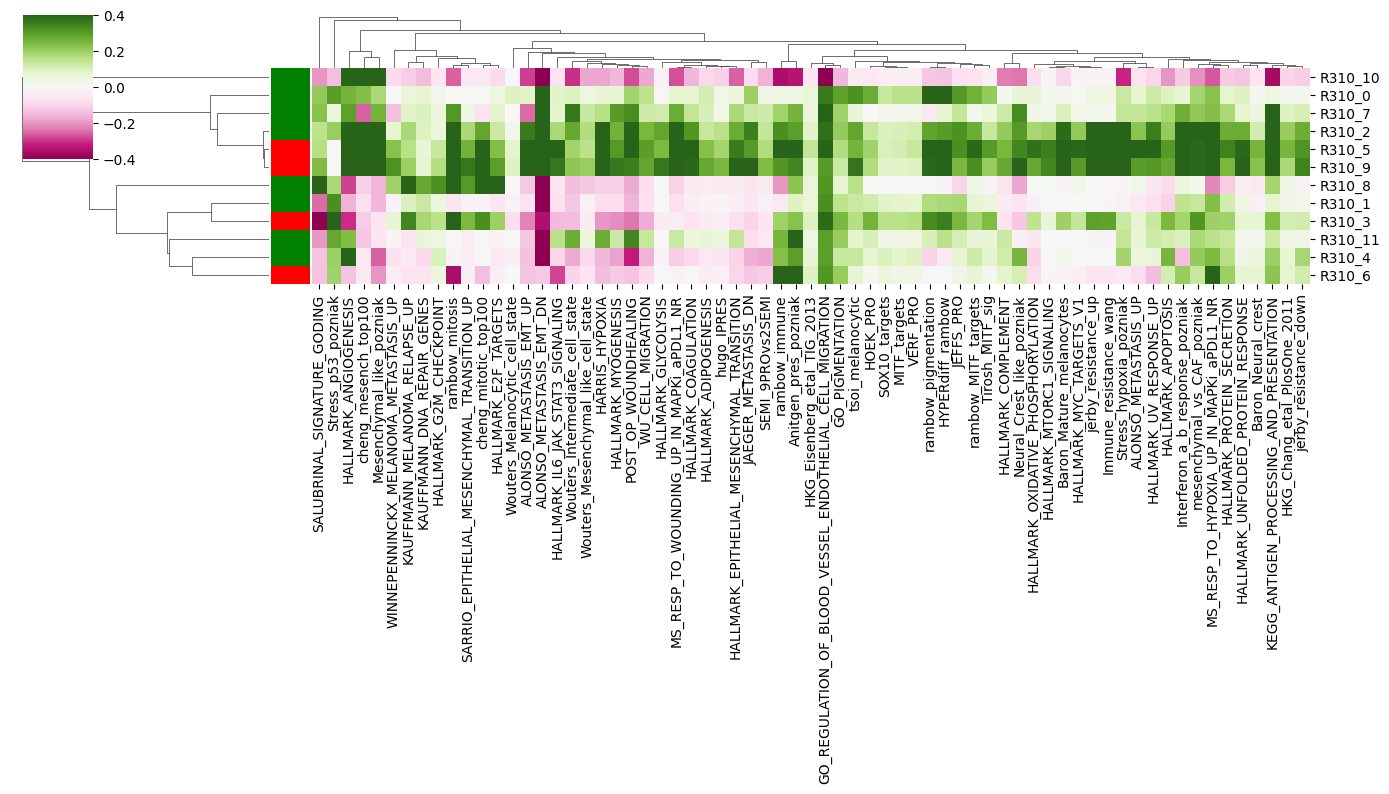

In [440]:
sns.clustermap(plot, figsize=(14,8),xticklabels=True, cmap='PiYG', metric='cosine', row_colors=colors, vmin=-.4, vmax=.4)
plt.savefig("FIGURES1/IP_enrichments_new.pdf", dpi=300)